In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), np.prod(x_train.shape[1:])))
x_test = np.reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))

In [3]:
model = Sequential([
    Dense(128, activation='gelu', input_shape=(784,)),
    Dense(784, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mean_squared_error',)

In [4]:
_ = model.fit(x_train, x_train, epochs=20, batch_size=512, verbose=0)

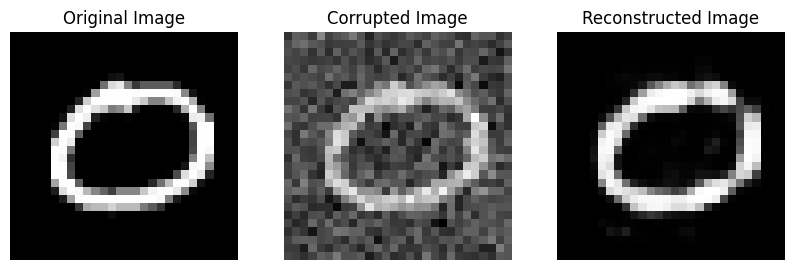

In [5]:
image = x_test[69]
corrupted_image = image + 0.2 * np.random.normal(loc=0.0, scale=1.0, size=image.shape)
reconstructed_image = model.predict(np.array([corrupted_image]), verbose=0)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes[0].imshow(image.reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(corrupted_image.reshape(28, 28), cmap='gray')
axes[1].set_title('Corrupted Image')
axes[2].imshow(reconstructed_image.reshape(28, 28), cmap='gray')
axes[2].set_title('Reconstructed Image')

for ax in axes:
    ax.axis('off')

plt.show()